In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random
import pathlib
import os

In [2]:
# Check for GPU availability
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('GPU is available')
else:
    print('No GPU detected')

num_gpus = len(physical_devices)

if num_gpus > 0:
    print(f"Number of available GPUs: {num_gpus}")
    for i in range(num_gpus):
        print(f"GPU {i}: {tf.config.experimental.get_device_details(physical_devices[0])}")
else:
    print("No GPUs available")

device = tf.device('gpu:0' if len(physical_devices) > 0 else 'cpu:0')


GPU is available
Number of available GPUs: 1
GPU 0: {'compute_capability': (7, 5), 'device_name': 'Tesla T4'}


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
data_dir = '/content/drive/MyDrive/pattern project/Eye_diseases/dataset'
os.listdir(data_dir)

['normal', 'cataract', 'glaucoma', 'diabetic_retinopathy']

In [5]:
tf.random.set_seed(42)

train_data = keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.1, subset = 'training', seed = 1, shuffle = True, batch_size = 16, image_size=(256,256))

test_data = keras.utils.image_dataset_from_directory(data_dir, validation_split = 0.1, subset = 'validation', seed = 1, shuffle = True, batch_size = 16, image_size=(256,256))

Found 4237 files belonging to 4 classes.
Using 3814 files for training.
Found 4237 files belonging to 4 classes.
Using 423 files for validation.


In [6]:
filenames = pathlib.Path(data_dir)
for label in train_data.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')

cataract : 1038
diabetic_retinopathy : 1108
glaucoma : 1017
normal : 1074


In [7]:
train_data.cardinality().numpy(),  test_data.cardinality().numpy()

(239, 27)

In [10]:
train_set = train_data.take(212)
val_set = train_data.skip(212)

In [11]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(212, 27)

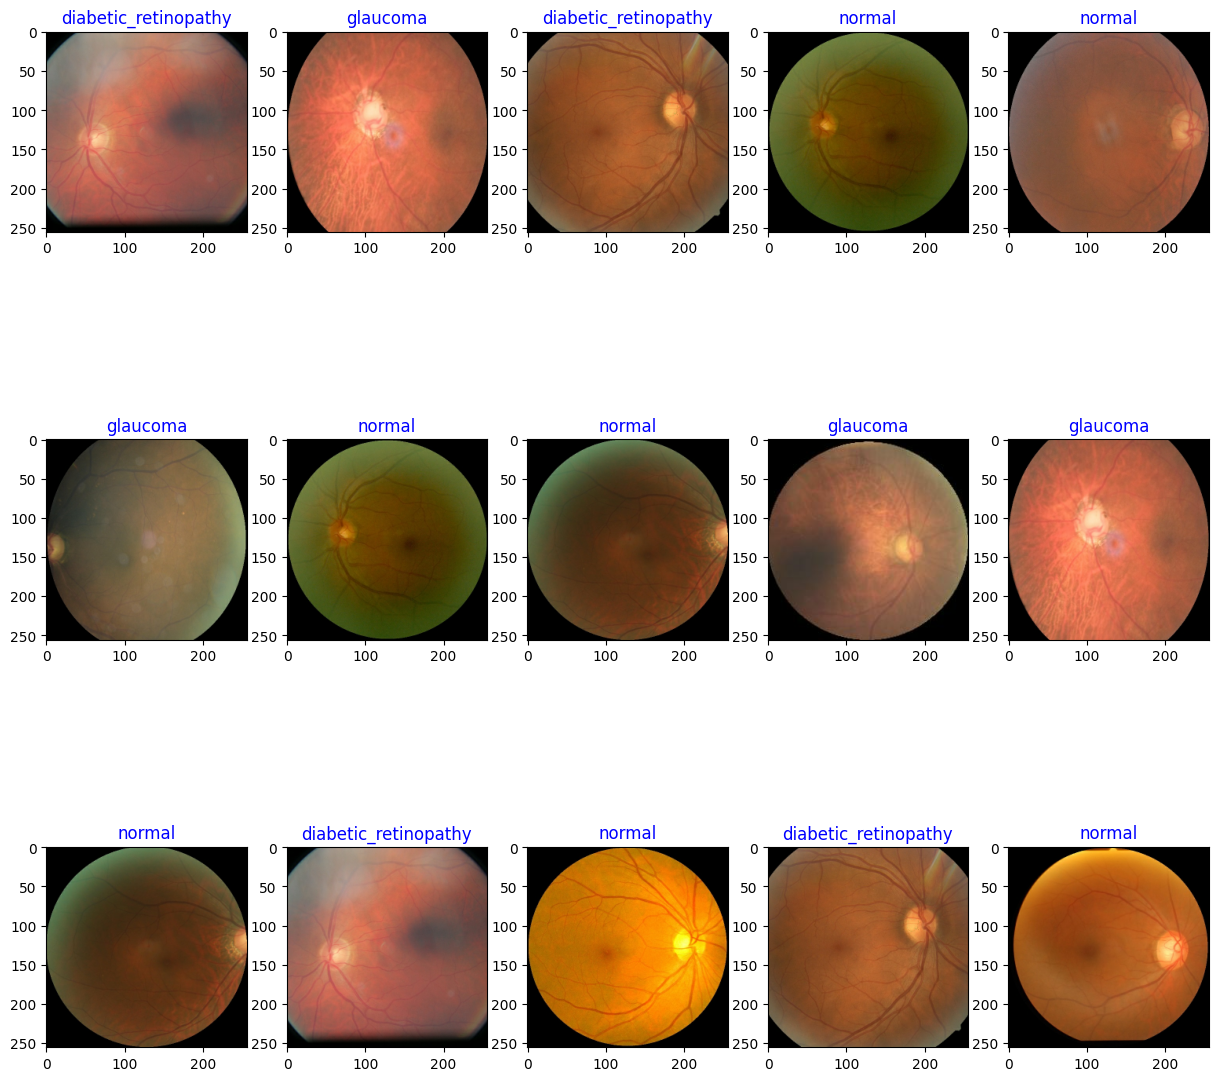

In [12]:
# print random images from the train set
plt.figure(figsize = (15, 15))
for images, labels in train_set.take(1):
    for i in range(15):
        index = random.randint(0, len(images))
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[index].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[index]], color= 'blue', fontsize= 12)
        plt.axis(True)
plt.show()

In [13]:
for images_batch, labels_batch in train_set:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(16, 256, 256, 3)
(16,)


In [14]:
from tensorflow.keras import layers

In [15]:
tf.random.set_seed(42)

model = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64,(3,3), activation='relu', input_shape=(128,128,3)), # Hidden Layer 1
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(32,(3,3), activation='relu'), # Hidden Layer 2
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(128,(3,3), activation='relu'), # Hidden Layer 3
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(), # Output layer
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, name ='feature_dense', activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(4, activation='softmax')
])


In [16]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer = keras.optimizers.Adam(), metrics = 'accuracy')

In [17]:
history_1 = model.fit(train_set, epochs=20, validation_data=val_set)

Epoch 1/20
212/212 [==============================] - 566s 3s/step - loss: 0.9246 - accuracy: 0.5510 - val_loss: 0.7427 - val_accuracy: 0.6540
Epoch 2/20
212/212 [==============================] - 72s 339ms/step - loss: 0.6887 - accuracy: 0.6899 - val_loss: 0.6051 - val_accuracy: 0.7062
Epoch 3/20
212/212 [==============================] - 57s 265ms/step - loss: 0.6121 - accuracy: 0.7226 - val_loss: 0.6244 - val_accuracy: 0.6896
Epoch 4/20
212/212 [==============================] - 58s 268ms/step - loss: 0.5895 - accuracy: 0.7264 - val_loss: 0.5710 - val_accuracy: 0.7370
Epoch 5/20
212/212 [==============================] - 57s 265ms/step - loss: 0.5655 - accuracy: 0.7435 - val_loss: 0.6200 - val_accuracy: 0.7299
Epoch 6/20
212/212 [==============================] - 73s 340ms/step - loss: 0.5630 - accuracy: 0.7409 - val_loss: 0.6077 - val_accuracy: 0.7133
Epoch 7/20
212/212 [==============================] - 60s 277ms/step - loss: 0.5556 - accuracy: 0.7473 - val_loss: 0.5747 - val_accu